In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.drop('customerID',axis=1,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1700\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [11]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

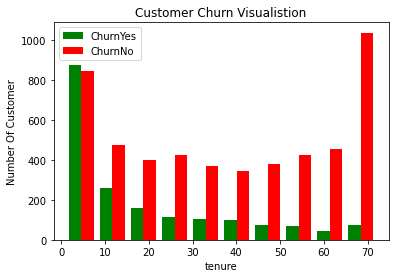

In [14]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['ChurnYes','ChurnNo'])
plt.xlabel('tenure')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Visualistion')
plt.legend()

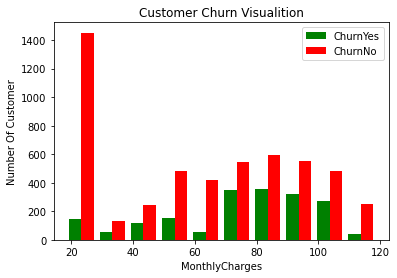

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Visualition')

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['ChurnYes','ChurnNo'])
plt.legend()

In [16]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column} : {df[column].unique()}')

In [17]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1700\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1700\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1700\411746494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [21]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1700\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [23]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4809,1,0,1,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5743,1,1,0,0,0.521127,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1004,0,0,0,0,0.281690,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [27]:
X = df2.drop(['Churn'],axis=1)
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.5459 - accuracy: 0.7118
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.7975
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8075
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8062
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accura

In [30]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4818 - accuracy: 0.7761


[0.4818044900894165, 0.7761194109916687]

In [31]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.41527534],
       [0.4863969 ],
       [0.04039683],
       [0.8607348 ],
       [0.45625663]], dtype=float32)

In [32]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [33]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [34]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.57      0.60       408

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

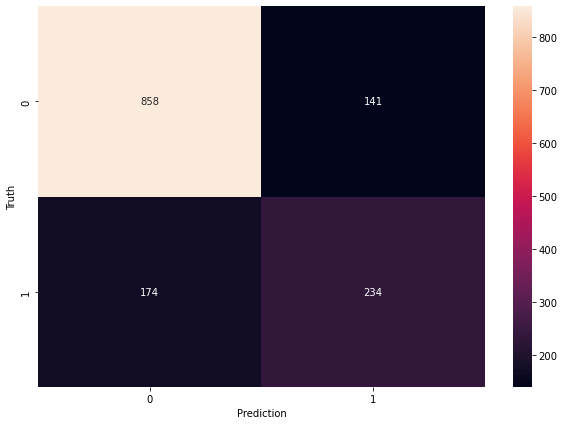

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [37]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [38]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5298 - accuracy: 0.7209
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7986
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8052
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8096
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8114
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8126
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4018 - accura

In [39]:
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [40]:
count_class_0, count_class_1

(5163, 1869)

In [41]:
df_class_0.shape

(5163, 27)

In [42]:
df_class_1.shape

(1869, 27)

In [43]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [44]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [45]:
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2417,0,0,0,0,0.126761,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4870,0,0,0,1,0.661972,1,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0
1108,1,0,0,0,0.957746,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5132,0,0,1,1,0.985915,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1594,1,0,0,1,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [46]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [47]:
X_test.shape

(748, 26)

In [48]:
y_test.shape

(748,)

In [49]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6294 - accuracy: 0.6719
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4967 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4897 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7759
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8311
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8321
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8271
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8298
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8308
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8298
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8291
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8308
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8324
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8321
Epoch 93/100


# oversampling

In [51]:
count_class_0, count_class_1

(5163, 1869)

In [53]:
df_class_1_over = df_class_1.sample(count_class_0 ,replace=True)